In [1]:

import IPython
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import itertools

from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge 
from catboost import CatBoost
from sklearn.metrics import confusion_matrix

import lightgbm as lgb



In [2]:
df = pd.read_csv("Desktop/iris.csv", header='infer')
df = df[["sepal.length","sepal.width","petal.length","petal.width","variety"]]

#Za x przyjmuje dane bez nazw kwiatów z bazy
X = df.drop("variety",axis=1)

#Za y przyjmuje nazwy kwiatów, które chce ai wyszukac
Y = df["variety"]

#Dane treningowe, i dane testowe
# _param test_size <0:1> dane float, 
# _param Steruje tasowaniem stosowanym do danych przed zastosowaniem podziału.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=12)


lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 3,           #max liczba lisci
    'learning_rate': 0.01,      #zwiekszenie szybkosci uczenia
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


print('Starting training...')

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=280,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)
gbm.save_model('model.txt')

Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 0.693526	valid_0's l2: 0.680447
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.687862	valid_0's l2: 0.668142
[3]	valid_0's l1: 0.682254	valid_0's l2: 0.656085
[4]	valid_0's l1: 0.676703	valid_0's l2: 0.64427
[5]	valid_0's l1: 0.671206	valid_0's l2: 0.632693
[6]	valid_0's l1: 0.665206	valid_0's l2: 0.620859
[7]	valid_0's l1: 0.659009	valid_0's l2: 0.60876
[8]	valid_0's l1: 0.652875	valid_0's l2: 0.596903
[9]	valid_0's l1: 0.647052	valid_0's l2: 0.585765
[10]	valid_0's l1: 0.641039	valid_0's l2: 0.574373
[11]	valid_0's l1: 0.63511	valid_0's l2: 0.563039
[12]	valid_0's l1: 0.62924	valid_0's l2: 0.551935
[13]	valid_0's l1: 0.623429	valid_0's l2: 0.541057
[14]	valid_0's l1: 0.617677	valid_0's l2: 0.530399
[15]	valid_0's l1: 0.611981	valid_0's l2: 0.519959
[1

D:\Anacodna\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


In [3]:
print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
rmse_test = mean_squared_error(Y_test, y_pred) ** 0.5
print(f'The RMSE of prediction is: {rmse_test}')


#im mniejsze błąd średniokwadratowy (RMSE) tym lepsze, ale przy malej liczbie danych powinnno byc <0;1>

Starting predicting...
The RMSE of prediction is: 0.21004464166007003


<AxesSubplot:xlabel='variety'>

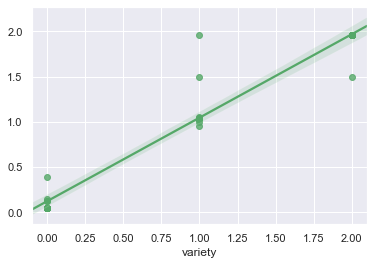

In [4]:
sns.regplot(x = Y_test,y =  y_pred, color ="g",truncate=False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

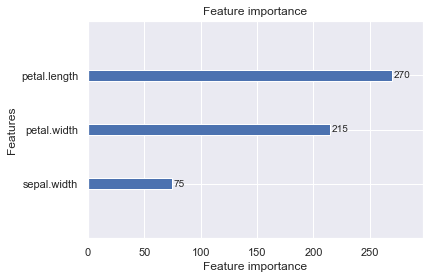

In [5]:
lgb.plot_importance(gbm)

<AxesSubplot:>

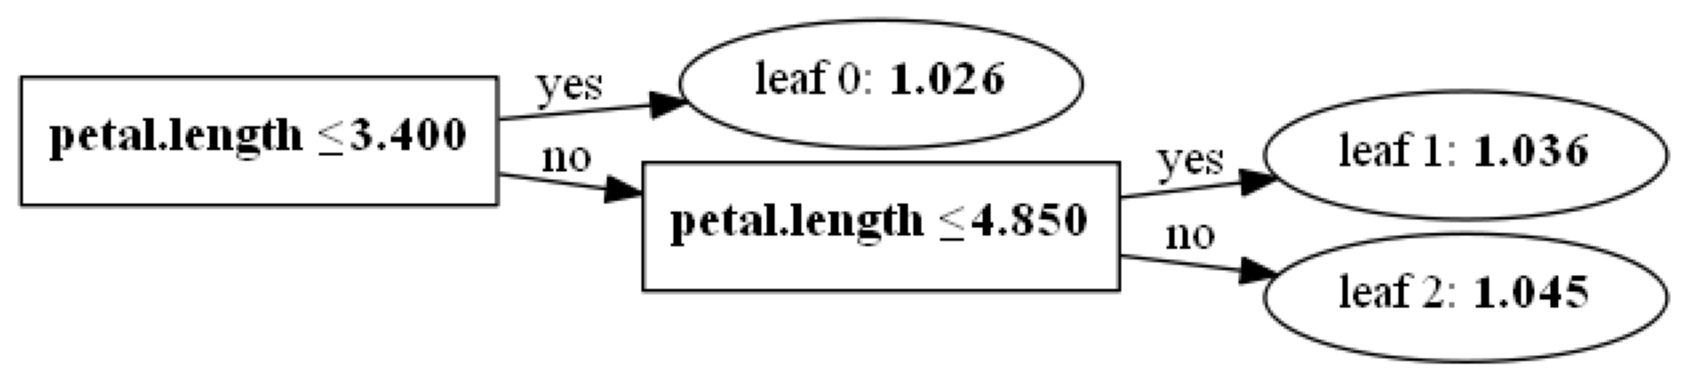

In [6]:
lgb.plot_tree(gbm, figsize=(30,40))


In [7]:
df['variety'].value_counts()

0    50
1    50
2    50
Name: variety, dtype: int64